# Feature Selection

By including all of the possible features into the model, we increase the danger of overfitting the model to our training data.



**Feature Selection**
- Domain Knowledge
- Correlation matrix
- Heat map
- Data quality analysis
- Coefficient analysis
- Imputation


**Feature Expansion**

- One hot encoding
- Interaction terms
- Domain knowledge
- Binning: continuous into categorical variables
- Ordinal encoding/factorize (e.g. weekdays in strings)
- Timestamp
- Normalization (changing distribution of the underlying data) e.g. z-score: set mean to 0,
Set standard dev to 1 - Gaussian distribution for models that prefer to have normally distributed data)


In [1]:
# Import the dataset
from sklearn import datasets

# Import the usual packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the models
from statsmodels.api import OLS, add_constant # OLS = Ordinary Least Squares
# Ordinary Least Squares is the mathematical way of solving for the coefficients of a Linear Regression
# OLS of statsmodels is the LinearRegression of sklearn
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

# Import tools for preprocessing and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Set the figure size of matplotlib plots to (12,6)
plt.rcParams['figure.figsize'] = (12,6)

#### Load the Data

In [3]:
boston = datasets.load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# Create X data
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y = boston.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

#### Train-Test-Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 1) Remove highly correlated variables

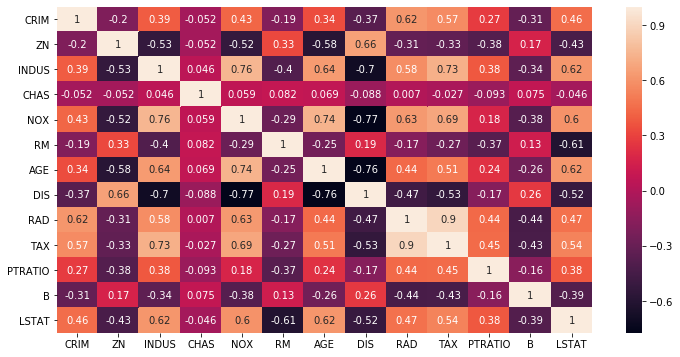

In [11]:
sns.heatmap(X_train.corr(), annot=True)

When do we start removing correlated variables?

If the correlation between two variables is 1 or -1, you want to drop one of those.<br>
That means, if it is 0.9 it is already not 100% clear.

If we are mainly interested in prediction, we have reason to be more conservative with removing correlated variables.

An alternative measure, that tries to capture this explainability by other features is the Variance Inflation Factor. To calculate the variance inflation factor you would run separate linear regression for each input feature on all other input features and look at $\frac{1}{1 - R^2}$. If it is high, that means your input feature can be well explained by all other input features and could possibly be dropped. If the VIF exceeds 5 (10) then you might want to drop the feature.

Two different thoughts on correlation:

- If we look at the correlation between the X variables (the input features), we are primarily concerned with finding features that capture the same information. If we find very high correlations, one of the two features might be dropped.

- Looking at correlation between X and y gives us an intuition as to whether there might be linear relationships between X and y. If you find a correlation of 0, be careful not to include this feature. Example: if the true relationship was $y = x^2$, then the correlation would be 0 between y and x.


In [42]:
df_train = X_train.copy()

In [43]:
df_train['y'] = y_train

In [44]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46,18.5
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05,33.2
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12,13.1
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,7.5


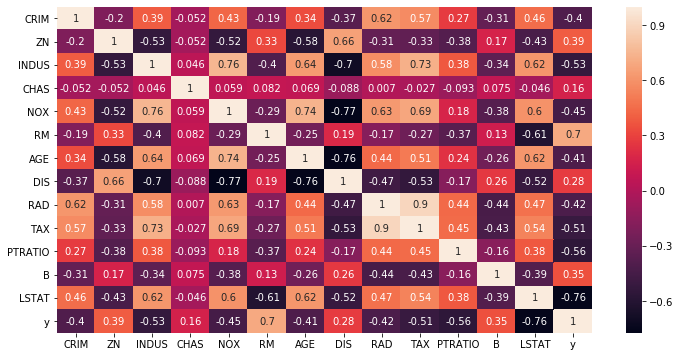

In [45]:
sns.heatmap(df_train.corr(), annot=True)

## 2) Select significant features
Traina Linear Regression model with `statsmodels` and remove features with high p-values.

In [34]:
# create the model
# In statsmodels you have to pass in X and y already when you create the model
# You have to add_constant which just includes a intercept into the model
ols = OLS(y_train, add_constant(X_train))

In [35]:
# Fit the model: save the fitted model in a variable
ols_results = ols.fit()

In [36]:
# Look at the model output
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     93.87
Date:                Thu, 27 Aug 2020   Prob (F-statistic):          9.85e-108
Time:                        10:51:34   Log-Likelihood:                -1102.0
No. Observations:                 379   AIC:                             2232.
Df Residuals:                     365   BIC:                             2287.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9333      5.682      6.500      0.000      25.759      48.107
CRIM          -0.1177      0.037     -3.143      0.002      -0.191      -0.044
ZN             0.0440      0.015      2.933      0.004       0.015       0.074
INDUS         -0.0058      0.067     -0.086      0.931      -0.137       0.125
CHAS           2.3934      0.962      2.488      0.013       0.502       4.285
NOX          -15.5894      4.331     -3.600      0.000     -24.106      -7.073
RM             3.7690      0.472      7.981      0.000       2.840       4.698
AGE           -0.0070      0.015     -0.472      0.637      -0.036       0.022
DIS           -1.4350      0.224     -6.401      0.000      -1.876      -0.994
RAD            0.2401      0.073      3.301      0.001       0.097       0.383
TAX           -0.0113      0.004     -2.779      0.006      -0.019      -0.003
PTRATIO       -0.9855      0.145     -6.793      0.000      -1.271      -0.700
B              0.0084      0.003      2.782      0.006       0.002       0.014
LSTAT         -0.4991      0.058     -8.667      0.000      -0.612      -0.386
==============================================================================
Omnibus:                      141.715   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.545
Skew:                           1.549   Prob(JB):                    3.01e-145
Kurtosis:                       8.705   Cond. No.                     1.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The ols_result.summary() provides us with p-values for each input feature.

What this p-value basically means:

For each input feature separately, we are doing the following:

- Question is: does our input feature explain y?
- Assumption: No it does not. --> Coefficient is in reality 0
- We calculate the probability of observing the corresponding coefficient (eg. 3,76 for RM) to this input feature, if the true value was 0
- In case of RM it returns as a p-value of 0.000. This tells us that it is very very very unlikely that the input feature RM is not acutally related to y.

We can make a statement that there is evidence for an input feature (RM) being relevant if the p-value is very small.

## 3) Use RF Feature Importance
Train a Linear Regression model with `statsmodels` and remove features with high p-values.

In [37]:
rf = RandomForestRegressor(max_depth=5, random_state=0)

In [38]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [41]:
df_fi = pd.DataFrame({'feature_importance': rf.feature_importances_, 'feature': X_train.columns})
df_fi.sort_values('feature_importance', ascending=False)

,feature_importance,feature
5,0.430408,RM
12,0.421507,LSTAT
0,0.039985,CRIM
7,0.039661,DIS
10,0.017768,PTRATIO
4,0.014229,NOX
9,0.013537,TAX
11,0.007375,B
6,0.007096,AGE
2,0.004890,INDUS


One problem with the RF feature_importance_ is that it kind of discriminates against features with few unique values.

Something you might want to look into:

In [46]:
from sklearn.inspection import permutation_importance

In [56]:
pi = permutation_importance(rf, X_train, y_train)
pi = pd.DataFrame({'importance': pi['importances_mean'], 'feature': X_train.columns})

,importance,feature
3,0.000206,CHAS
1,0.000434,ZN
8,0.002643,RAD
2,0.004446,INDUS
6,0.004736,AGE
11,0.005306,B
9,0.016341,TAX
4,0.024125,NOX
10,0.031096,PTRATIO
0,0.032924,CRIM


In [57]:
pi.sort_values('importance', ascending=False)

,importance,feature
12,0.640894,LSTAT
5,0.470711,RM
7,0.036114,DIS
0,0.032924,CRIM
10,0.031096,PTRATIO
4,0.024125,NOX
9,0.016341,TAX
11,0.005306,B
6,0.004736,AGE
2,0.004446,INDUS


rf.feature_importances_ calculates how much a input feature contributes to reducing the gini index

permutation_importance: It takes each input feature separately, shuffles the values of this feature and measures how much that changes the outcome

## 4) Recursive Feature Elimination
Train the models multiple times, eliminating diffierent features in each run. In scikit, the RFE class can be used to optimize an existing model:

In [58]:
from sklearn.feature_selection import RFE

In [67]:
rfe = RFE(rf, n_features_to_select=3)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(max_depth=5, random_state=0),
    n_features_to_select=3)

In [68]:
rfe_df = pd.DataFrame({'support': rfe.support_, 'ranking': rfe.ranking_, 'feature': X_train.columns})
    # rfe.support_: booleans indicating features to include 
    # rfe.ranking_: integers indicating importance

In [69]:
rfe_df.sort_values('ranking')

,support,ranking,feature
0,True,1,CRIM
5,True,1,RM
12,True,1,LSTAT
7,False,2,DIS
10,False,3,PTRATIO
9,False,4,TAX
4,False,5,NOX
6,False,6,AGE
11,False,7,B
2,False,8,INDUS


In the beginning it includes all features.

Then, recursively, it takes out the least important feature. "Least important" is measured in terms of feature_importance_ (RF) or coefficient value (Linear Regression).

In every cycle it reduces the number of features by one.

#### For linear regression

If you use the recursive feature elimination RFE with linear regression, be careful and scale your X data before you do. Because it takes into account the actual coefficient value (and that depends on the scale of the data).

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [80]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [81]:
rfe_linreg = RFE(linreg, n_features_to_select=3)
rfe_linreg.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [82]:
rfe_df = pd.DataFrame({'support': rfe_linreg.support_
                       , 'ranking': rfe_linreg.ranking_
                       , 'feature': X_train.columns})

In [83]:
rfe_df.sort_values('ranking')

,support,ranking,feature
5,True,1,RM
10,True,1,PTRATIO
12,True,1,LSTAT
7,False,2,DIS
4,False,3,NOX
9,False,4,TAX
8,False,5,RAD
1,False,6,ZN
0,False,7,CRIM
11,False,8,B


#### permutation importance with linreg

In [76]:
pi_linreg = permutation_importance(linreg, X_train, y_train)
pi_linreg = pd.DataFrame({'importance': pi_linreg['importances_mean']
                          , 'feature': X_train.columns})

In [78]:
pi_linreg.sort_values('importance', ascending=False)

,importance,feature
12,0.295892,LSTAT
7,0.189984,DIS
5,0.159590,RM
10,0.118244,PTRATIO
9,0.092047,TAX
8,0.090924,RAD
4,0.079650,NOX
1,0.028141,ZN
0,0.024009,CRIM
11,0.016970,B


## 5) Regularization
Use **Lasso** or **ElasticNet**. Both will set coefficients of linear models to zero.

#### Try SequentialFeatureSelector

http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

**Try automl**

https://automl.github.io/auto-sklearn/master/